<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')

In [64]:
roomba_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X_ODOM', 'Y_ODOM', 'Theta', 'Velocity',
       'Odometry_Distance', 'X_GR', 'Y_GR', 'Ground_Truth_Distance',
       'Surface_Type', 'Time_To_Travel', 'Cumulative_Time', 'Cumulative_Theta',
       'Series_ID', 'Distance_travelled_error', 'X_error', 'Y_error',
       'timestamp'],
      dtype='object')

In [65]:
mobile_robot_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'X_ODOM', 'Y_ODOM', 'Theta', 'Velocity',
       'Odometry_Distance', 'X_GR', 'Y_GR', 'Ground_Truth_Distance',
       'Surface_Type', 'Time_To_Travel', 'Cumulative_Time', 'Cumulative_Theta',
       'Series_ID', 'Distance_travelled_error', 'X_error', 'Y_error',
       'timestamp'],
      dtype='object')

In [29]:
import datetime
from datetime import datetime


def get_Date_Formatted(date_list):
  datetime_obj_list=[]
  for x in date_list:
    datetimeObj = datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    datetime_obj_list.append(datetimeObj)
  return datetime_obj_list


mobile_robot_data['timestamp']=get_Date_Formatted(mobile_robot_data['timestamp'])
roomba_data['timestamp']=get_Date_Formatted(roomba_data['timestamp'])



In [66]:
roomba_data=roomba_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
mobile_robot_data=mobile_robot_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


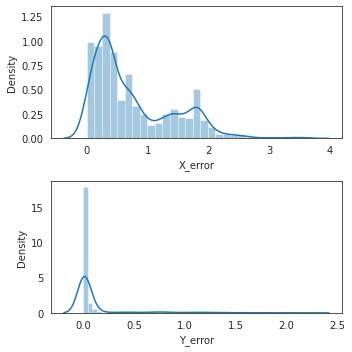

In [67]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.distplot(roomba_data['X_error'],ax = axs[0])
plt2 = sns.distplot(roomba_data['Y_error'], ax = axs[1])
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


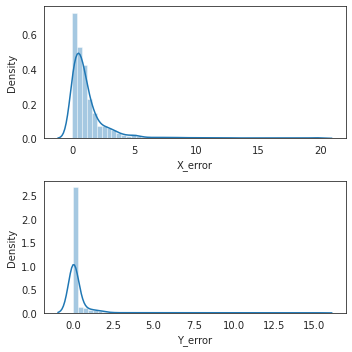

In [68]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.distplot(mobile_robot_data['X_error'],ax = axs[0])
plt2 = sns.distplot(mobile_robot_data['Y_error'], ax = axs[1])
plt.tight_layout()

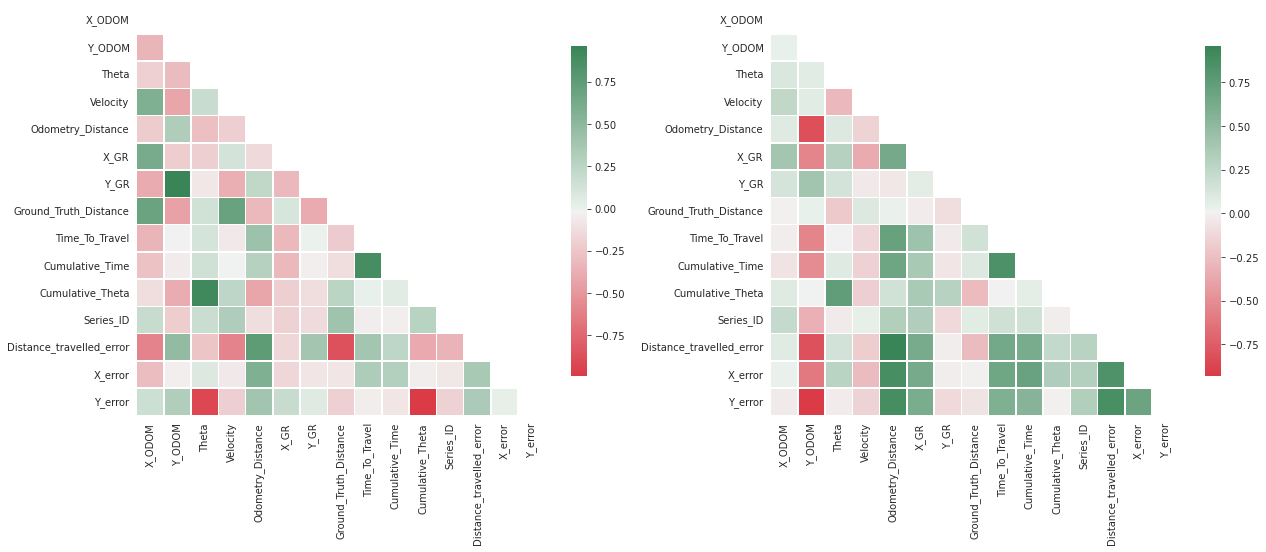

In [69]:
corr1 = roomba_data.corr()
corr2 = mobile_robot_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,2,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
f.tight_layout()

In [98]:
df=mobile_robot_data[mobile_robot_data['Series_ID']==61]
df=df[['Cumulative_Time','X_error','Y_error']]

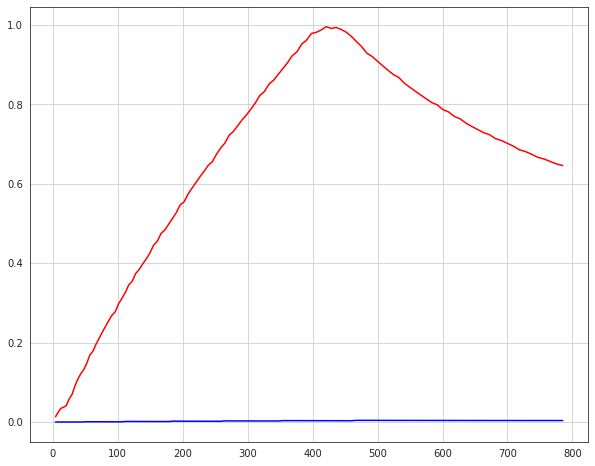

In [99]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(df["Cumulative_Time"], df["X_error"], color='Red')
plt.plot(df["Cumulative_Time"], df["Y_error"], color='Blue')

# ax.set_xlabel('Date', fontsize='11')
# ax.set_ylabel('Opening Price in USD', fontsize='11')
# plt.title('Netflix Stock Prices (April 13th 2018 ~)')
plt.grid()
plt.show()

In [71]:
mobile_robot_data

,X_ODOM,Y_ODOM,Theta,Velocity,Odometry_Distance,X_GR,Y_GR,Ground_Truth_Distance,Surface_Type,Time_To_Travel,Cumulative_Time,Cumulative_Theta,Series_ID,Distance_travelled_error,X_error,Y_error,timestamp
0,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011141,-0.001021,0.012151,TILE,0.545720,0.545720,0.000000e+00,0.0,0.012151,0.012141,0.000021,2021-10-27 12:37:24.312
1,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011228,-0.001021,0.012384,TILE,0.596121,1.141841,0.000000e+00,0.0,0.012384,0.012228,0.000021,2021-10-27 12:37:24.510
2,-0.001,-0.001,0.000000e+00,0.25,0.000000,0.011441,-0.001022,0.013017,TILE,0.646103,1.787944,0.000000e+00,0.0,0.013017,0.012441,0.000022,2021-10-27 12:37:24.609
3,0.001,-0.001,0.000000e+00,0.25,0.002000,0.013168,-0.001025,0.020518,TILE,0.696950,2.484894,0.000000e+00,0.0,0.018518,0.012168,0.000025,2021-10-27 12:37:24.708
4,0.007,-0.001,0.000000e+00,0.25,0.008000,0.015079,-0.001028,0.029477,TILE,0.733509,3.218403,0.000000e+00,0.0,0.021477,0.008079,0.000028,2021-10-27 12:37:24.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.410241,-0.003200,2.113419,CARPET,9.502222,746.610621,-3.477997e-14,61.0,0.035410,0.666759,0.003800,2021-10-30 13:17:26.993
13314,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.414512,-0.003207,2.113332,CARPET,9.535574,756.146195,-3.502490e-14,61.0,0.035323,0.662488,0.003793,2021-10-30 13:17:27.092
13315,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.420822,-0.003216,2.113390,CARPET,9.585728,765.731923,-3.526983e-14,61.0,0.035381,0.656178,0.003784,2021-10-30 13:17:27.193
13316,2.077,-0.007,-2.449294e-16,0.30,2.078009,1.427019,-0.003226,2.113390,CARPET,9.635704,775.367627,-3.551476e-14,61.0,0.035381,0.649981,0.003774,2021-10-30 13:17:27.290


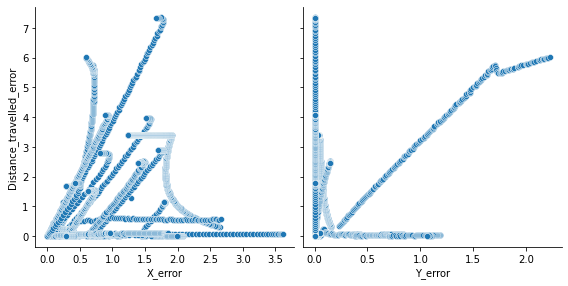

In [50]:
roomba_data.columns
sns.pairplot(roomba_data, x_vars=[ 'X_error', 'Y_error'], y_vars='Distance_travelled_error', height=4, aspect=1, kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


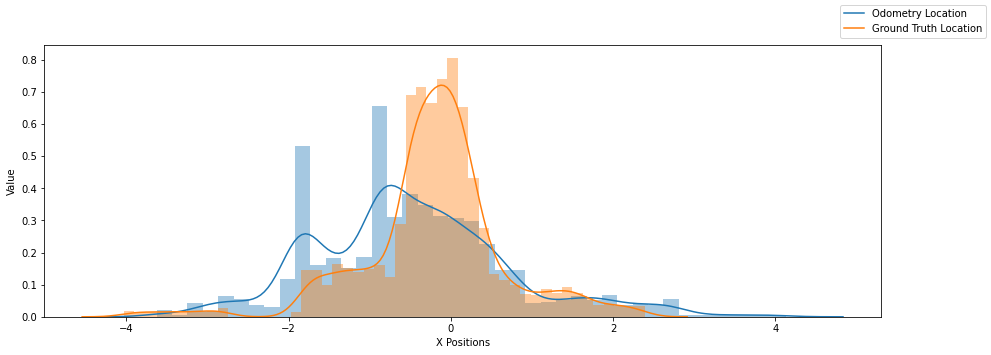

In [14]:
fig=plt.figure(figsize = (15,5))
sns.distplot(roomba_data['X_ODOM'])
sns.distplot(roomba_data['X_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("X Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


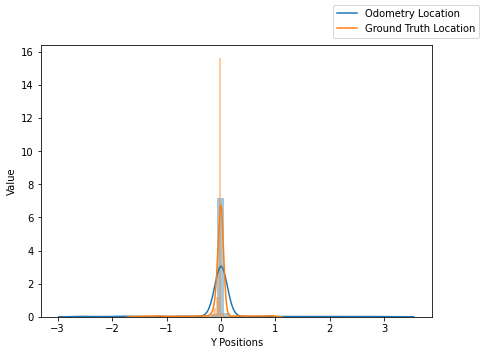

In [15]:
fig=plt.figure(figsize = (7,5))
sns.distplot(roomba_data['Y_ODOM'])
sns.distplot(roomba_data['Y_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("Y Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


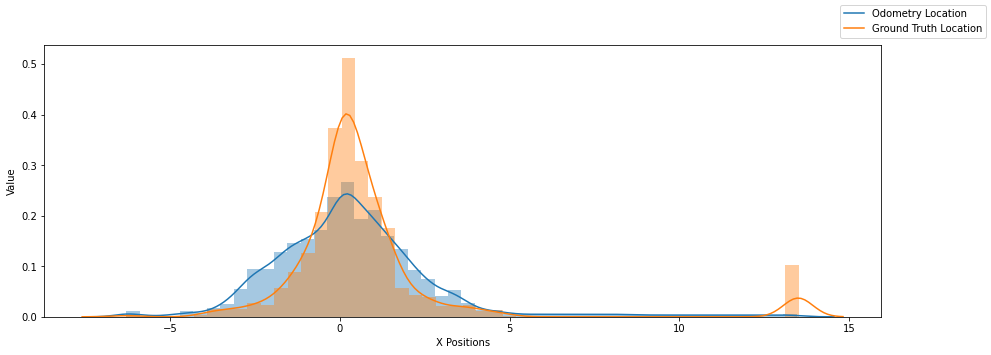

In [16]:

fig=plt.figure(figsize = (15,5))
sns.distplot(mobile_robot_data['X_ODOM'])
sns.distplot(mobile_robot_data['X_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("X Positions")
plt.ylabel("Value")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


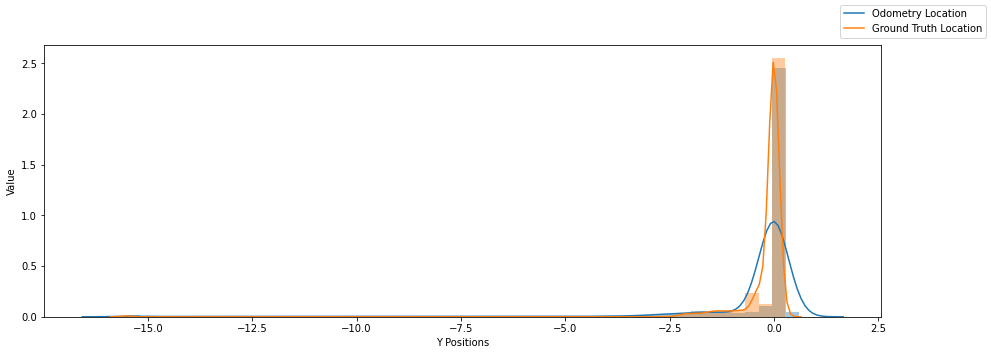

In [17]:

fig=plt.figure(figsize = (15,5))
sns.distplot(mobile_robot_data['Y_ODOM'])
sns.distplot(mobile_robot_data['Y_GR'])
fig.legend(labels=['Odometry Location','Ground Truth Location'])
plt.xlabel("Y Positions")
plt.ylabel("Value")
plt.show()


In [18]:

import matplotlib.ticker as ticker
# df=mobile_robot_data[mobile_robot_data['Velocity']< -0.45 ]

# g=sns.tsplot(data = df['Velocity'], time  = df['timestamp'])

# g.xaxis.set_major_locator(ticker.LinearLocator(20))


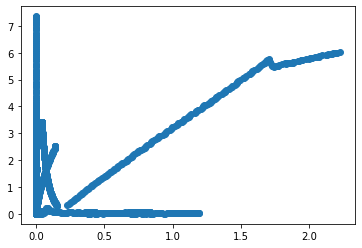

In [19]:
df = roomba_data[["Distance_travelled_error", "Y_error"]]
plt.scatter(df["Y_error"],df["Distance_travelled_error"], )

In [21]:
X = df.values
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NameError: ignored

In [23]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

NameError: ignored

In [24]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.03)
outlier_index

NameError: ignored

In [ ]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

In [ ]:
# plot data
plt.scatter(df["Y_error"],df["Distance_travelled_error"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Y_error"], outlier_values["Distance_travelled_error"], color = "r")
